In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("large_weather_data.csv")
data

,Date,Temperature (°C),Humidity (%),Wind Speed (km/h),Rainfall (mm)
0,2024-07-01,32.4,56.1,12.6,0
1,2024-07-02,29.1,62.5,9.1,0
2,2024-07-03,32.8,60.6,13.2,0
3,2024-07-04,37.0,61.6,6.9,0
4,2024-07-05,28.1,53.0,15.1,20
...,...,...,...,...,...
360,2025-06-26,33.5,57.2,11.8,0
361,2025-06-27,38.4,59.4,11.9,10
362,2025-06-28,30.1,62.9,14.2,0
363,2025-06-29,32.4,54.2,12.2,0


In [3]:
data.isnull().sum().count

<bound method Series.count of Date                 0
Temperature (°C)     0
Humidity (%)         0
Wind Speed (km/h)    0
Rainfall (mm)        0
dtype: int64>

In [4]:
data.describe()

,Temperature (°C),Humidity (%),Wind Speed (km/h),Rainfall (mm)
count,365.000000,365.000000,365.0000,365.000000
mean,29.939178,59.621096,12.3800,1.726027
std,8.466377,12.229285,2.8697,4.749957
min,7.300000,23.100000,3.5000,0.000000
25%,23.200000,51.400000,10.4000,0.000000
50%,30.100000,59.400000,12.5000,0.000000
75%,36.600000,67.700000,14.1000,0.000000
max,45.000000,100.000000,19.9000,20.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               365 non-null    object 
 1   Temperature (°C)   365 non-null    float64
 2   Humidity (%)       365 non-null    float64
 3   Wind Speed (km/h)  365 non-null    float64
 4   Rainfall (mm)      365 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 14.4+ KB


In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0     2024-07-01
1     2024-07-02
2     2024-07-03
3     2024-07-04
4     2024-07-05
         ...    
360   2025-06-26
361   2025-06-27
362   2025-06-28
363   2025-06-29
364   2025-06-30
Name: Date, Length: 365, dtype: datetime64[ns]

In [7]:
data = data.sort_values('Date')
data

,Date,Temperature (°C),Humidity (%),Wind Speed (km/h),Rainfall (mm)
0,2024-07-01,32.4,56.1,12.6,0
1,2024-07-02,29.1,62.5,9.1,0
2,2024-07-03,32.8,60.6,13.2,0
3,2024-07-04,37.0,61.6,6.9,0
4,2024-07-05,28.1,53.0,15.1,20
...,...,...,...,...,...
360,2025-06-26,33.5,57.2,11.8,0
361,2025-06-27,38.4,59.4,11.9,10
362,2025-06-28,30.1,62.9,14.2,0
363,2025-06-29,32.4,54.2,12.2,0


Rename the column name

In [8]:
data = data.rename(columns=
{
    "Temperature (°C)": "Temperature",
    "Humidity (%)": "Humidity",
    "Wind Speed (km/h)": "Wind Speed",
    "Rainfall (mm)": "Rainfall"
})

Plotting temperature trends over a month

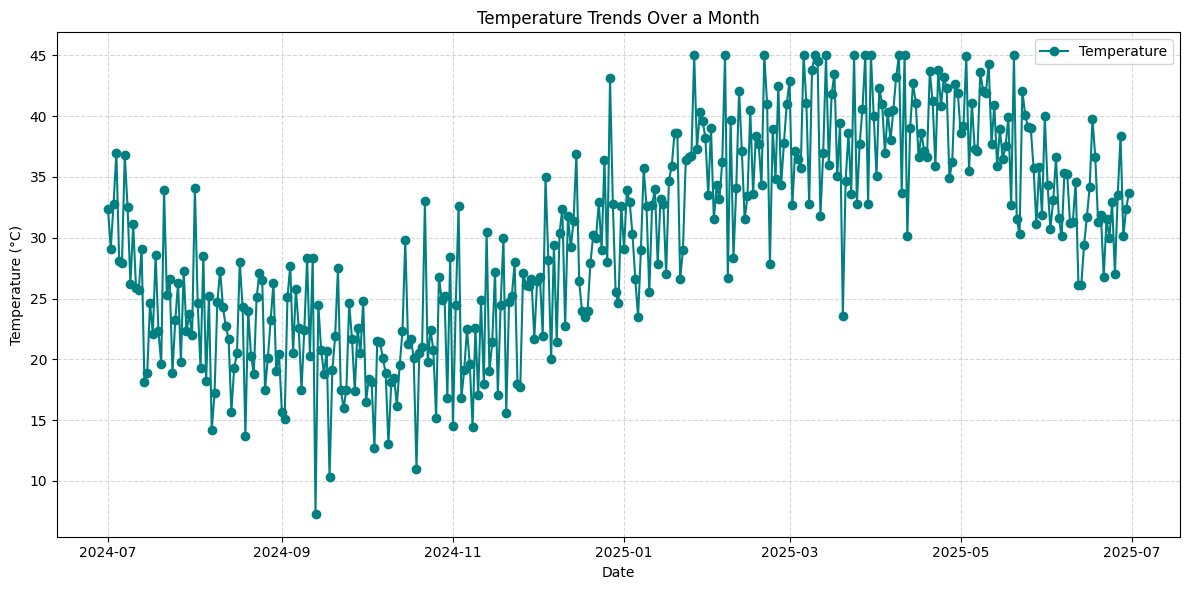

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Temperature'], marker='o', linestyle='-', color='teal', label='Temperature')

plt.title('Temperature Trends Over a Month')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Find day with maximum temperature

In [10]:
max_temp_row = data.loc[data['Temperature'].idxmax()]

# Display the date and the maximum temperature
print(f"The day with the maximum temperature is: {max_temp_row['Date'].date()}")
print(f"Maximum Temperature: {max_temp_row['Temperature']} °C")

The day with the maximum temperature is: 2025-01-26
Maximum Temperature: 45.0 °C


Analyzing average humidity

In [11]:
average_humidity = data['Humidity'].mean()

# Display the average humidity with 2 decimal precision
print(f"The average humidity over the period is: {average_humidity:.2f}%")

The average humidity over the period is: 59.62%


Checking correlation between temperature and humidity

In [12]:
correlation = data['Temperature'].corr(data['Humidity'])

# Display the correlation result
print(f"The correlation between Temperature and Humidity is: {correlation:.2f}")

The correlation between Temperature and Humidity is: -0.50


Set seaborn theme

In [13]:
sns.set(style="whitegrid")

Histogram: Temperature distribution

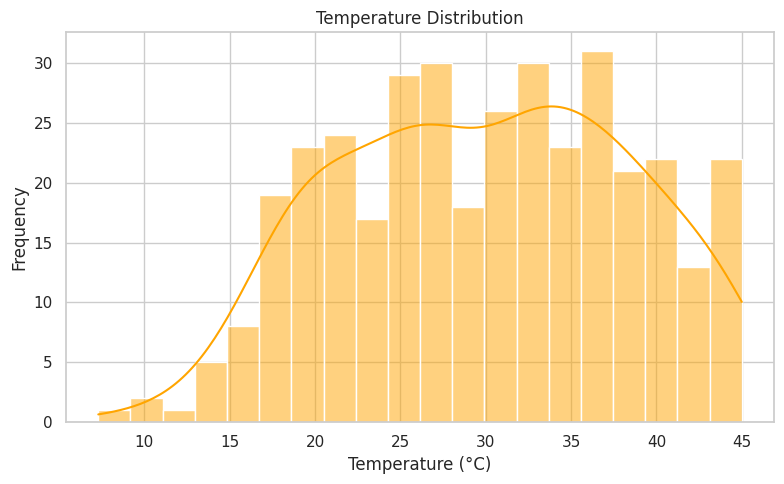

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Temperature'], bins=20, kde=True, color='orange')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Scatter plot: Temperature vs Humidity

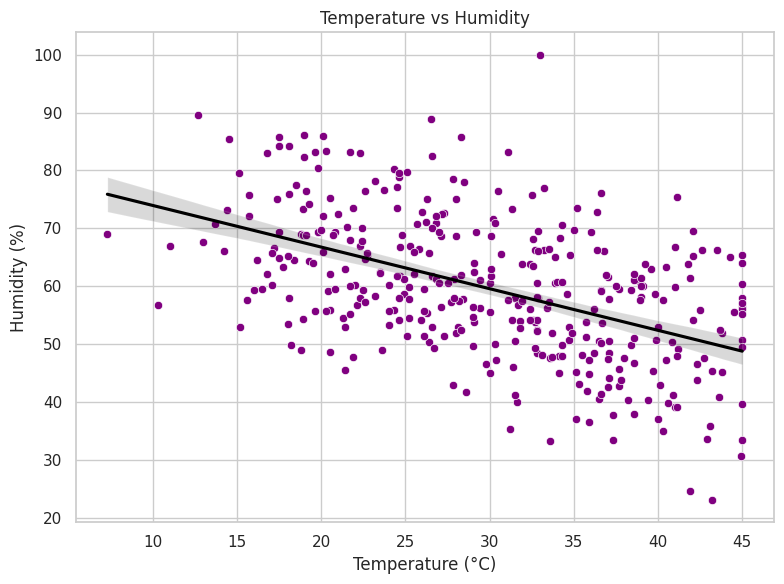

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Humidity', data=data, color='purple')
sns.regplot(x='Temperature', y='Humidity', data=data, scatter=False, color='black')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.show()

Heatmap: Correlation matrix

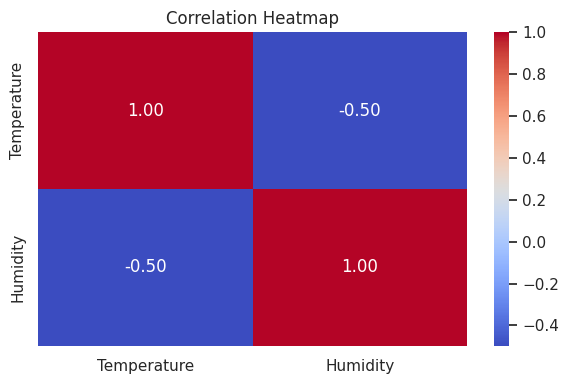

In [16]:
plt.figure(figsize=(6, 4))
corr_matrix = data[['Temperature', 'Humidity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()